In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u

cptac warning: Your version of cptac (0.7.0) is out-of-date. Latest is 0.7.1. Please run 'pip install --upgrade cptac' to update it. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 10)


In [5]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()

cptac warning: This data is under a publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: This data is under a publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


In [9]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [26]:

def plot_lin_regression(df1,x_axis, y_axis, hue, title = "Title", ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis,hue]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    corr, pval = scipy.stats.pearsonr(x1,y1)
        
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (28,20)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
     
       
        
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(2,2, "Correlation: %s\nPvalue: %s"%(corr,pval))
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
    
    if save_file_name != "file_name":
        plt.savefig(save_file_name+'.png')
        
    
    

# Plots for EGFR and CCL20

In [11]:
prot_hnscc = hnscc.get_proteomics()
prot_gbm = brain.get_proteomics()
prot_en = en.get_proteomics()
prot_colon = colon.get_proteomics()
prot_brca = brca.get_proteomics()
prot_luad = luad.get_proteomics()
prot_ovar = Ovar.get_proteomics()
prot_ccrcc = ccrcc.get_proteomics()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


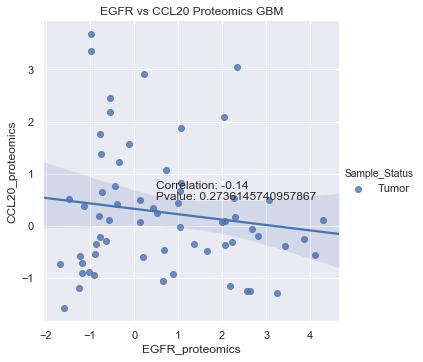

In [17]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CCL20","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CCL20_proteomics", "Sample_Status",title = "EGFR vs CCL20 Proteomics GBM", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


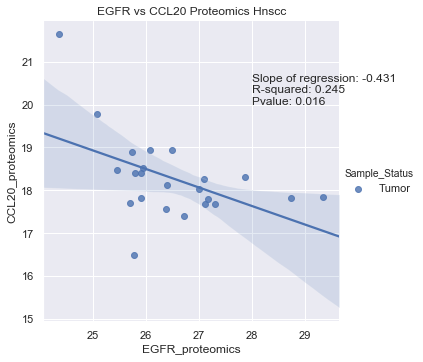

In [47]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CCL20","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CCL20_proteomics", "Sample_Status",title = "EGFR vs CCL20 Proteomics Hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 140 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


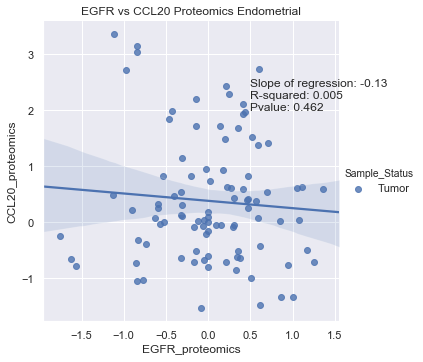

In [51]:
df1 = en.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CCL20","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CCL20_proteomics", "Sample_Status",title = "EGFR vs CCL20 Proteomics Endometrial", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


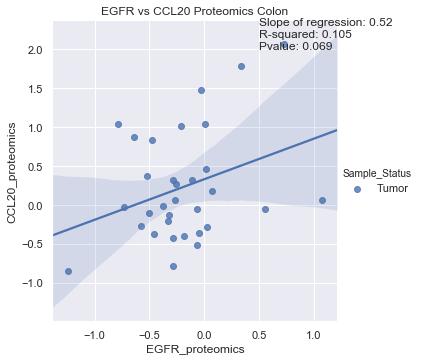

In [52]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CCL20","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CCL20_proteomics", "Sample_Status",title = "EGFR vs CCL20 Proteomics Colon", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


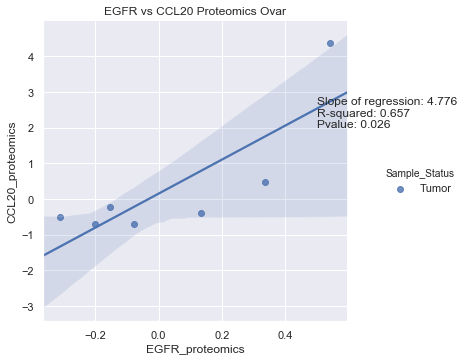

In [54]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CCL20","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CCL20_proteomics", "Sample_Status",title = "EGFR vs CCL20 Proteomics Ovar", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


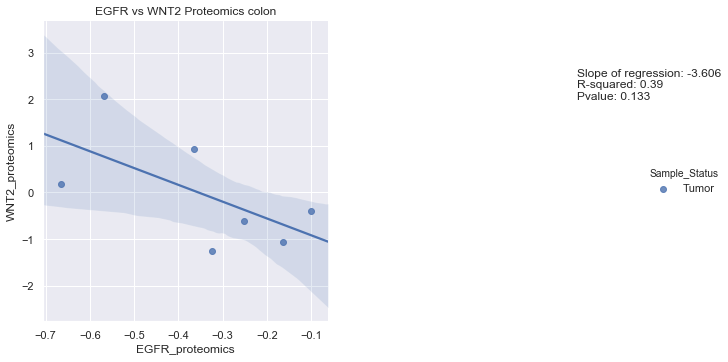

In [56]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["WNT2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","WNT2_proteomics", "Sample_Status",title = "EGFR vs WNT2 Proteomics colon", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


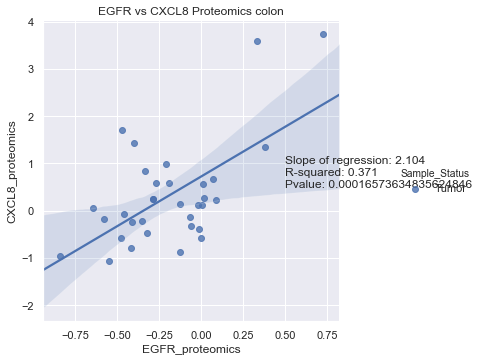

In [150]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CXCL8","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CXCL8_proteomics", "Sample_Status",title = "EGFR vs CXCL8 Proteomics colon", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


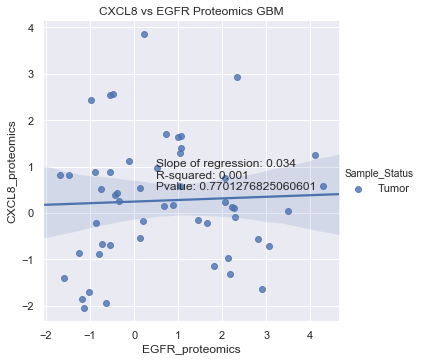

In [151]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CXCL8","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CXCL8_proteomics", "Sample_Status",title = "CXCL8 vs EGFR Proteomics GBM", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


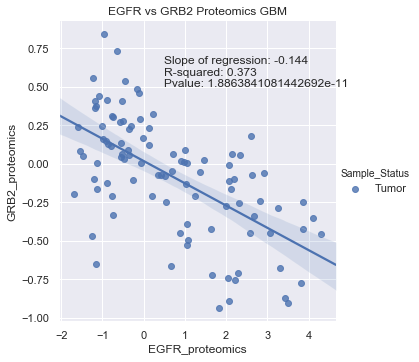

In [162]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics GBM", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


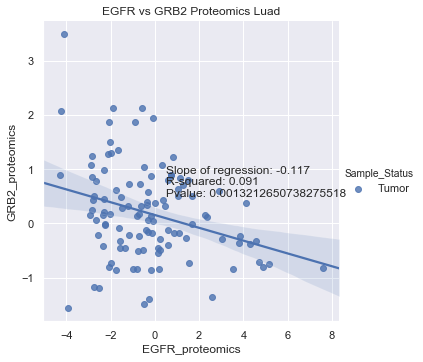

In [164]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Luad", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


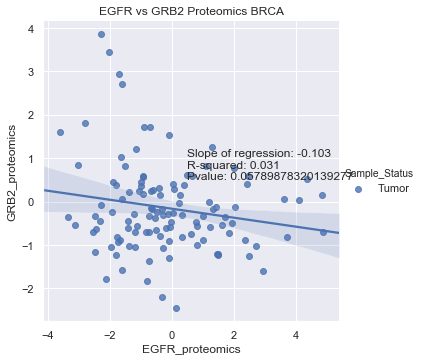

In [166]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics BRCA", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


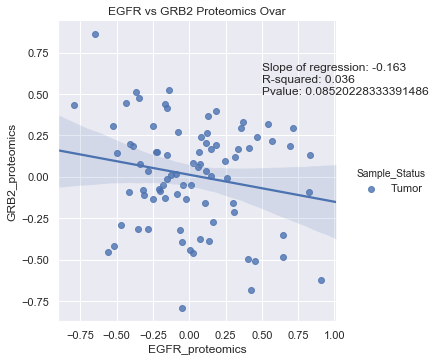

In [168]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Ovar", ra_stats = True, show_plot = True)

In [2]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics hnscc", ra_stats = True, show_plot = True)

NameError: name 'hnscc' is not defined

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


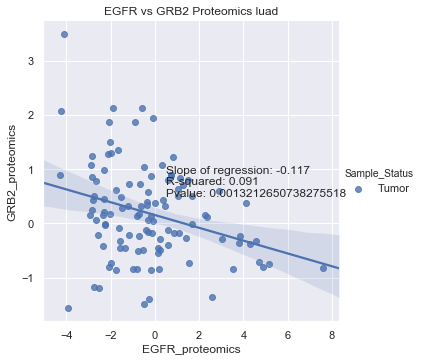

In [181]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics luad", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


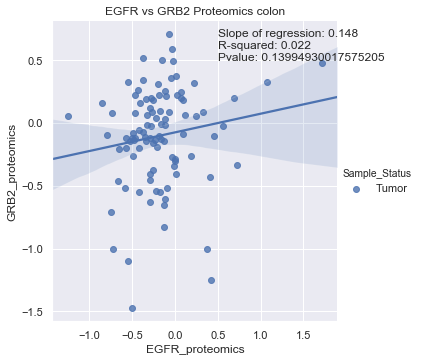

In [183]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics colon", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


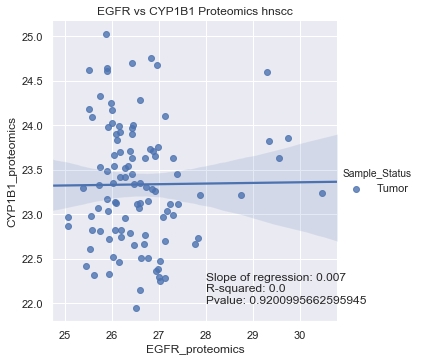

In [145]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CYP1B1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CYP1B1_proteomics", "Sample_Status",title = "EGFR vs CYP1B1 Proteomics hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


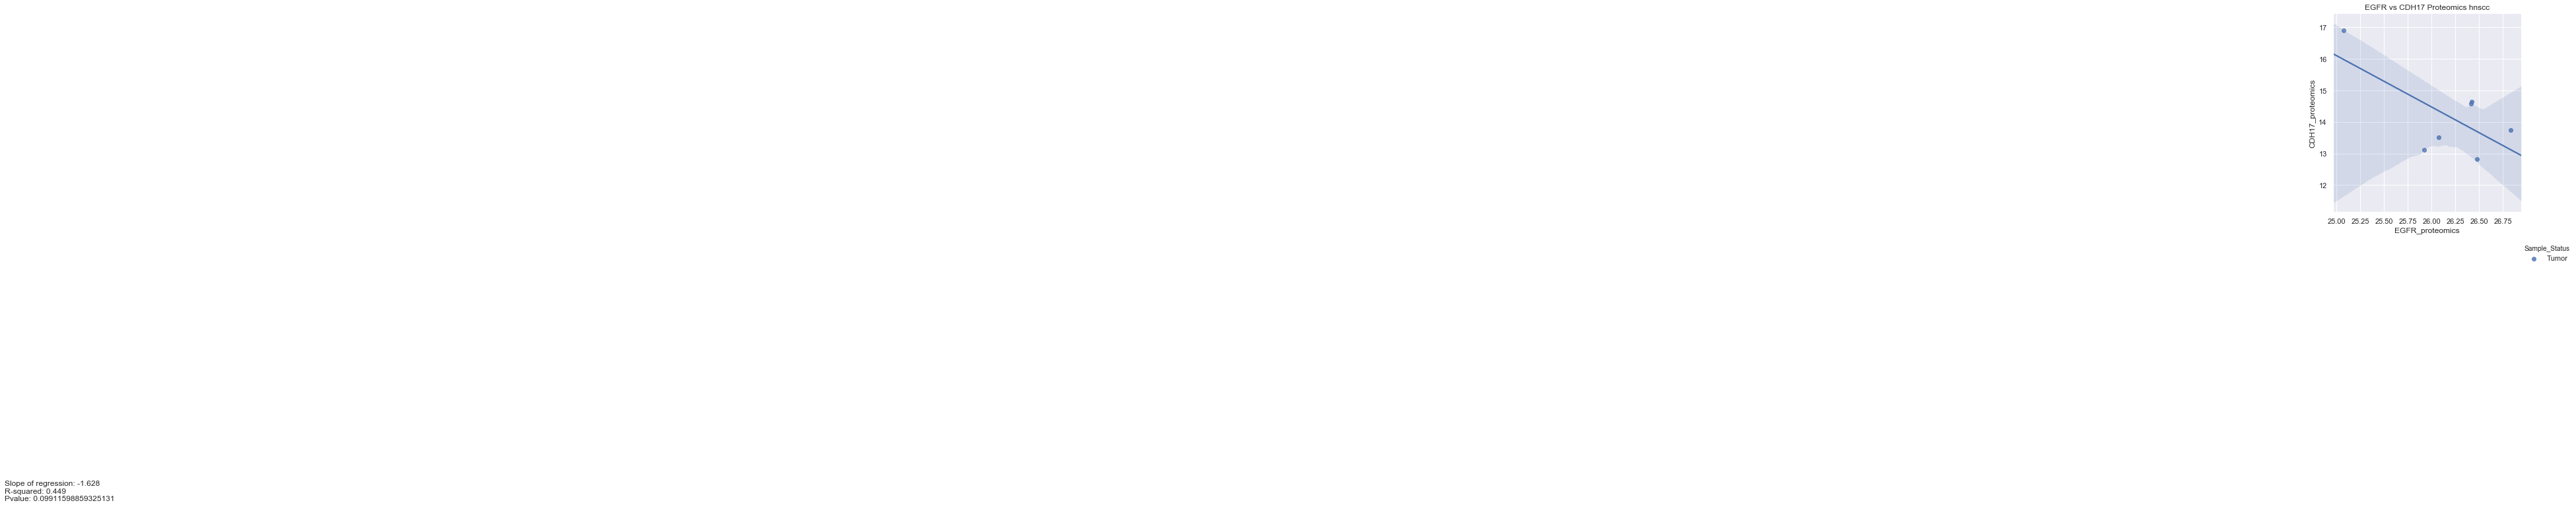

In [102]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CDH17","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","CDH17_proteomics", "Sample_Status",title = "EGFR vs CDH17 Proteomics hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


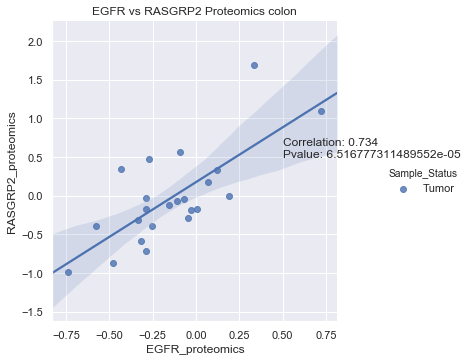

In [21]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics colon", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


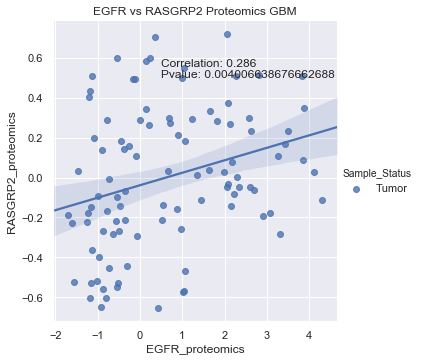

In [18]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics GBM", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


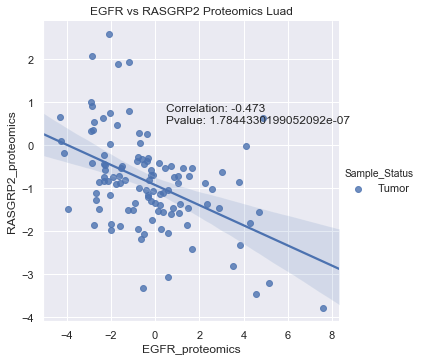

In [19]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Luad", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


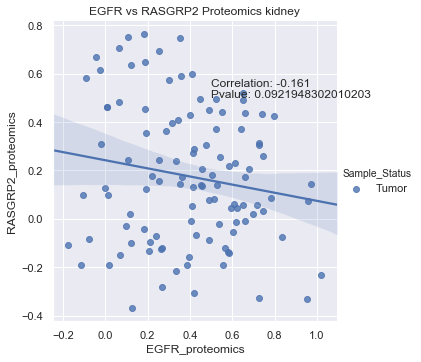

In [20]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics kidney", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


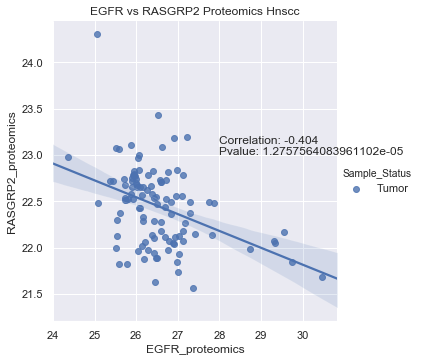

In [24]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


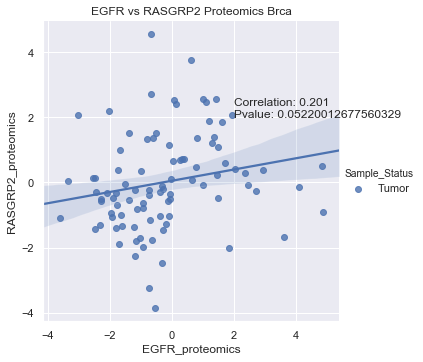

In [27]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Brca", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


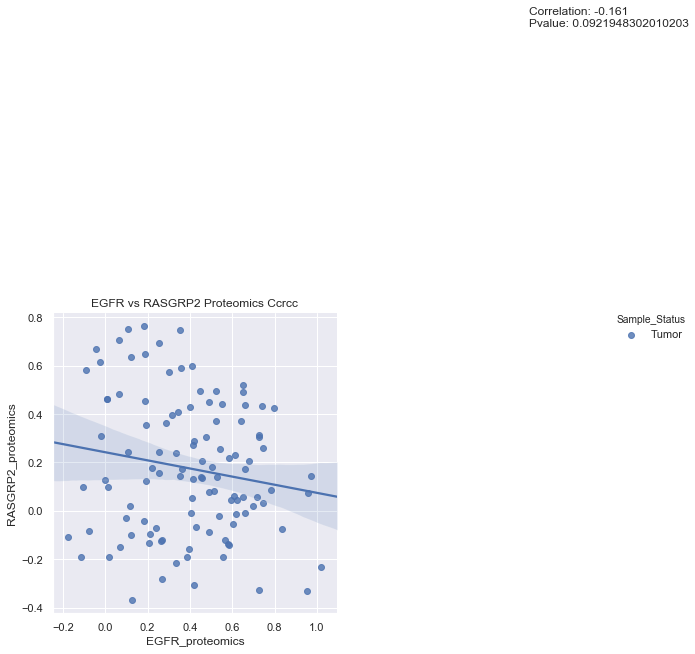

In [28]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["RASGRP2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"EGFR_proteomics","RASGRP2_proteomics", "Sample_Status",title = "EGFR vs RASGRP2 Proteomics Ccrcc", ra_stats = True, show_plot = True)

In [129]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PPM1B","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
#plot_lin_regression(df1,"EGFR_proteomics","PPM1B_proteomics", "Sample_Status",title = "EGFR vs PPM1B Proteomics Ccrcc", ra_stats = False, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


Name,EGFR_proteomics,PPM1B_proteomics,PPM1B_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status
Patient_ID,,,,,,,
C3L-00004,0.254999,-0.085430,-0.274262,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00010,0.526561,0.034008,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00011,0.268540,-0.085098,0.315706,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00026,0.578659,-0.148602,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00079,0.662720,-0.059138,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...,...
C3N-01646,0.013371,0.128517,NaN,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3N-01648,-0.105850,0.151579,0.006100,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3N-01649,0.180939,0.035388,-0.635620,[Silent],[p.I213I],Single_mutation,Tumor


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


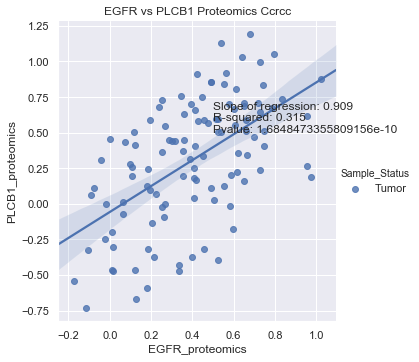

In [131]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLCB1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","PLCB1_proteomics", "Sample_Status",title = "EGFR vs PLCB1 Proteomics Ccrcc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


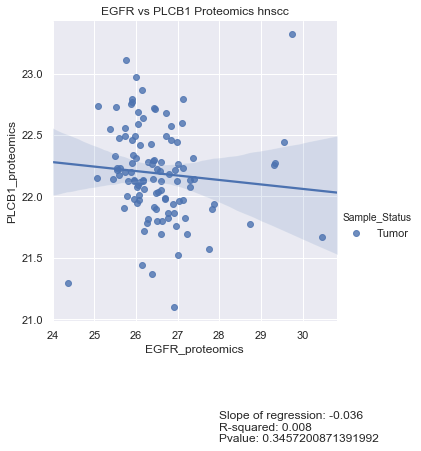

In [172]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PLCB1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1
plot_lin_regression(df1,"EGFR_proteomics","PLCB1_proteomics", "Sample_Status",title = "EGFR vs PLCB1 Proteomics hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


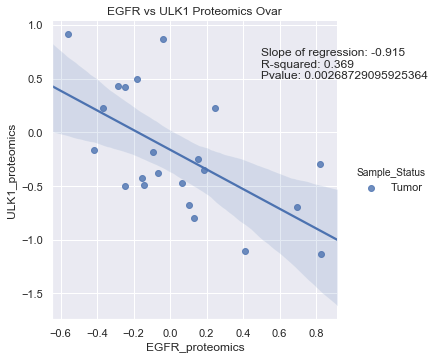

In [185]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ULK1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","ULK1_proteomics", "Sample_Status",title = "EGFR vs ULK1 Proteomics Ovar", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


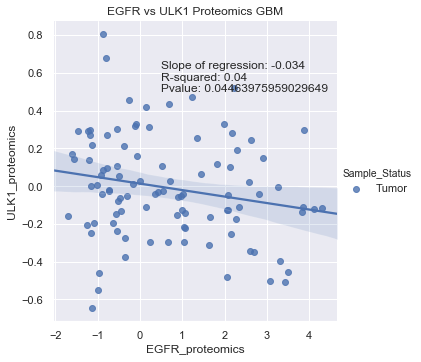

In [187]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ULK1","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","ULK1_proteomics", "Sample_Status",title = "EGFR vs ULK1 Proteomics GBM", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


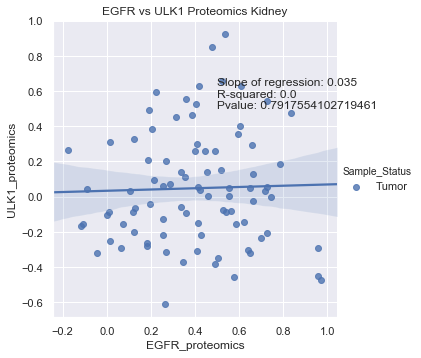

In [193]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ULK1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","ULK1_proteomics", "Sample_Status",title = "EGFR vs ULK1 Proteomics Kidney", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


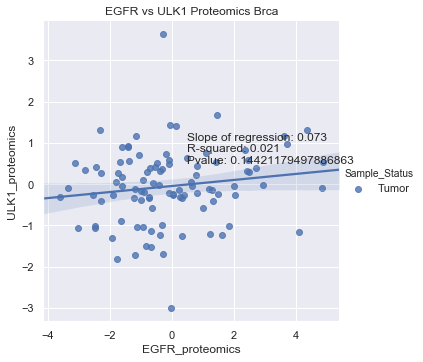

In [194]:
df1 = brca.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ULK1","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","ULK1_proteomics", "Sample_Status",title = "EGFR vs ULK1 Proteomics Brca", ra_stats = True, show_plot = True)


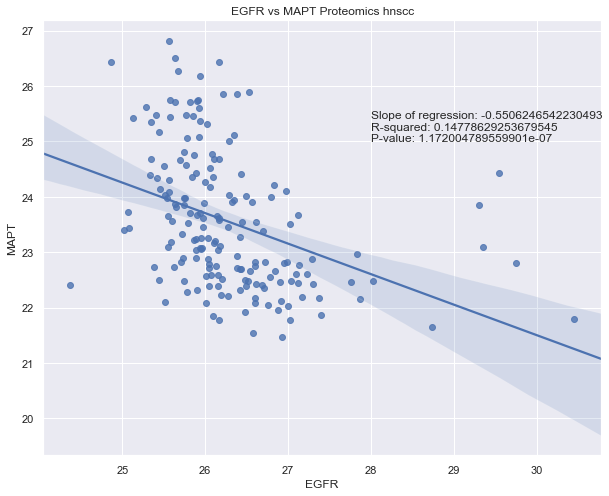

In [90]:
plot_lin_regression(prot_hnscc,"EGFR","MAPT","EGFR vs MAPT Proteomics hnscc", ra_stats = True, show_plot = True)

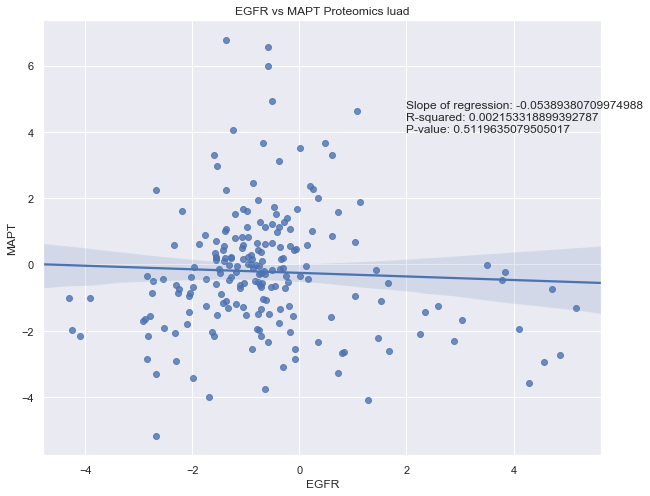

In [93]:
plot_lin_regression(prot_luad,"EGFR","MAPT","EGFR vs MAPT Proteomics luad", ra_stats = True, show_plot = True)

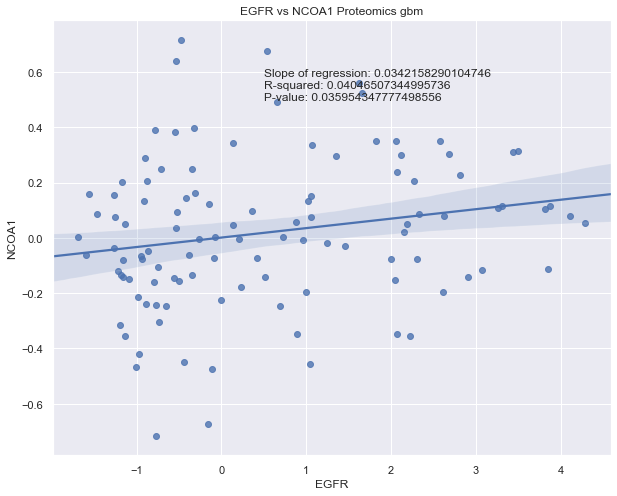

In [98]:
plot_lin_regression(prot_gbm,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics gbm", ra_stats = True, show_plot = True)

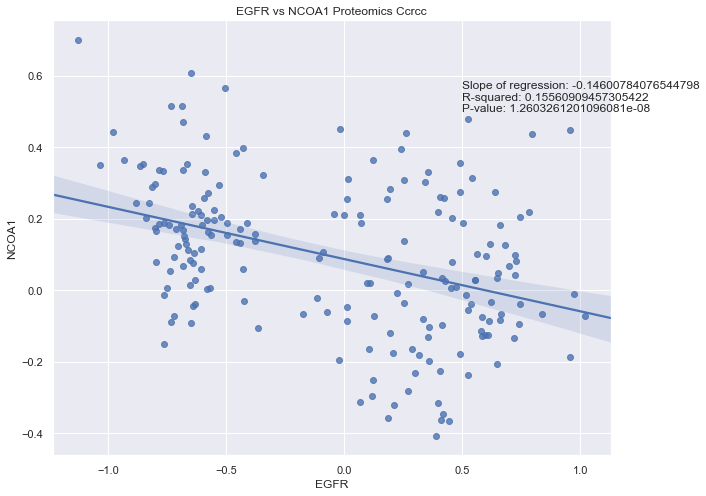

In [99]:
plot_lin_regression(prot_ccrcc,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Ccrcc", ra_stats = True, show_plot = True)

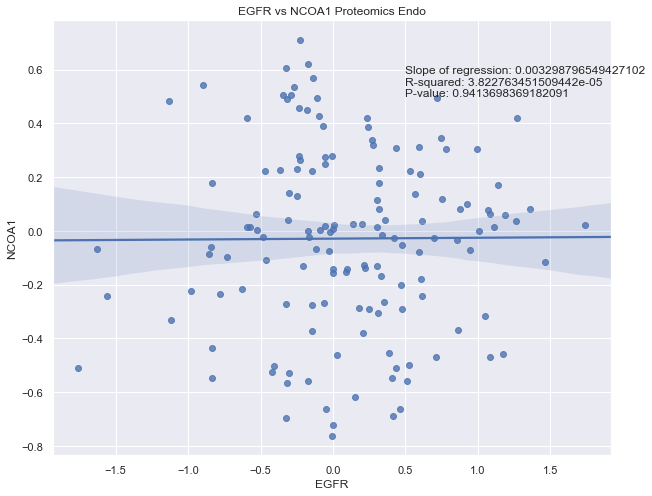

In [101]:
plot_lin_regression(prot_en,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Endo", ra_stats = True, show_plot = True)

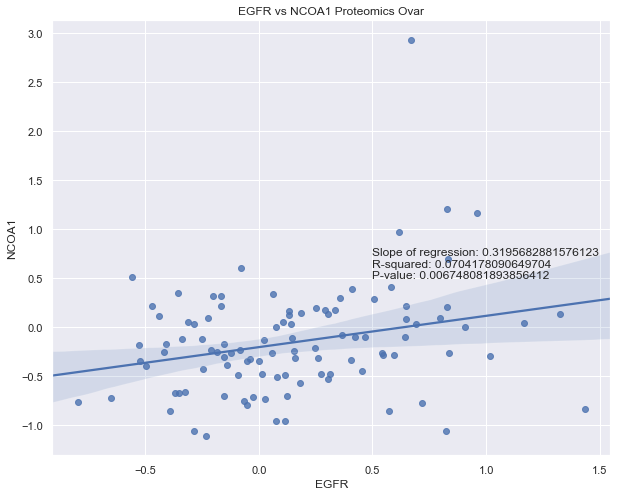

In [102]:
plot_lin_regression(prot_ovar,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Ovar", ra_stats = True, show_plot = True)

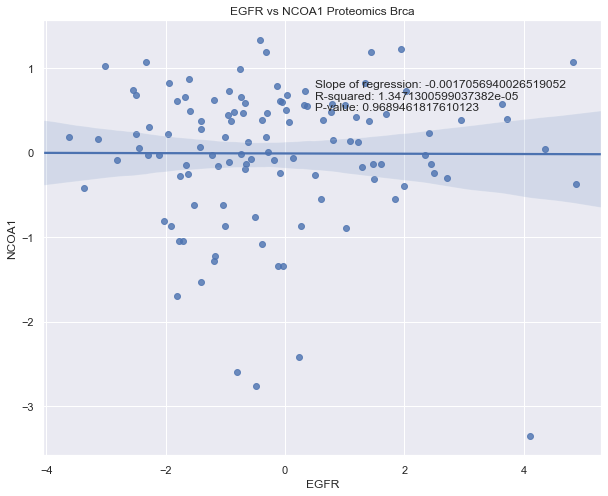

In [103]:
plot_lin_regression(prot_brca,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Brca", ra_stats = True, show_plot = True)

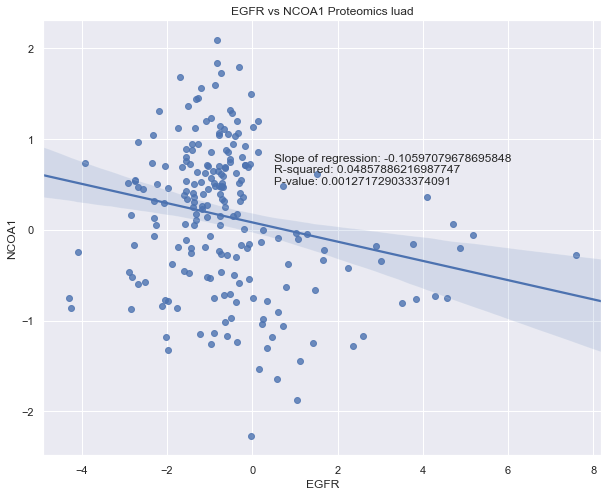

In [104]:
plot_lin_regression(prot_luad,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics luad", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


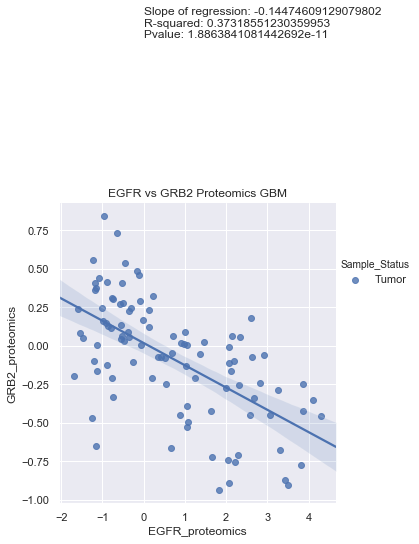

In [8]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics GBM", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


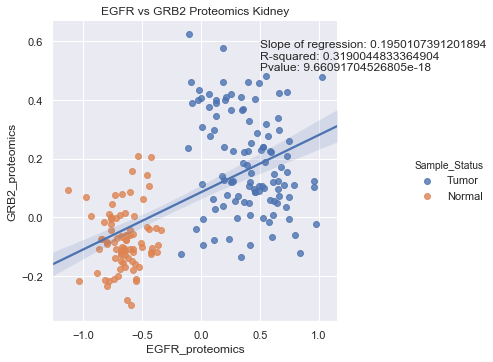

In [256]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Kidney", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


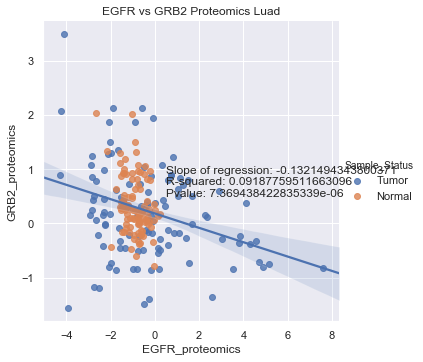

In [259]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Luad", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


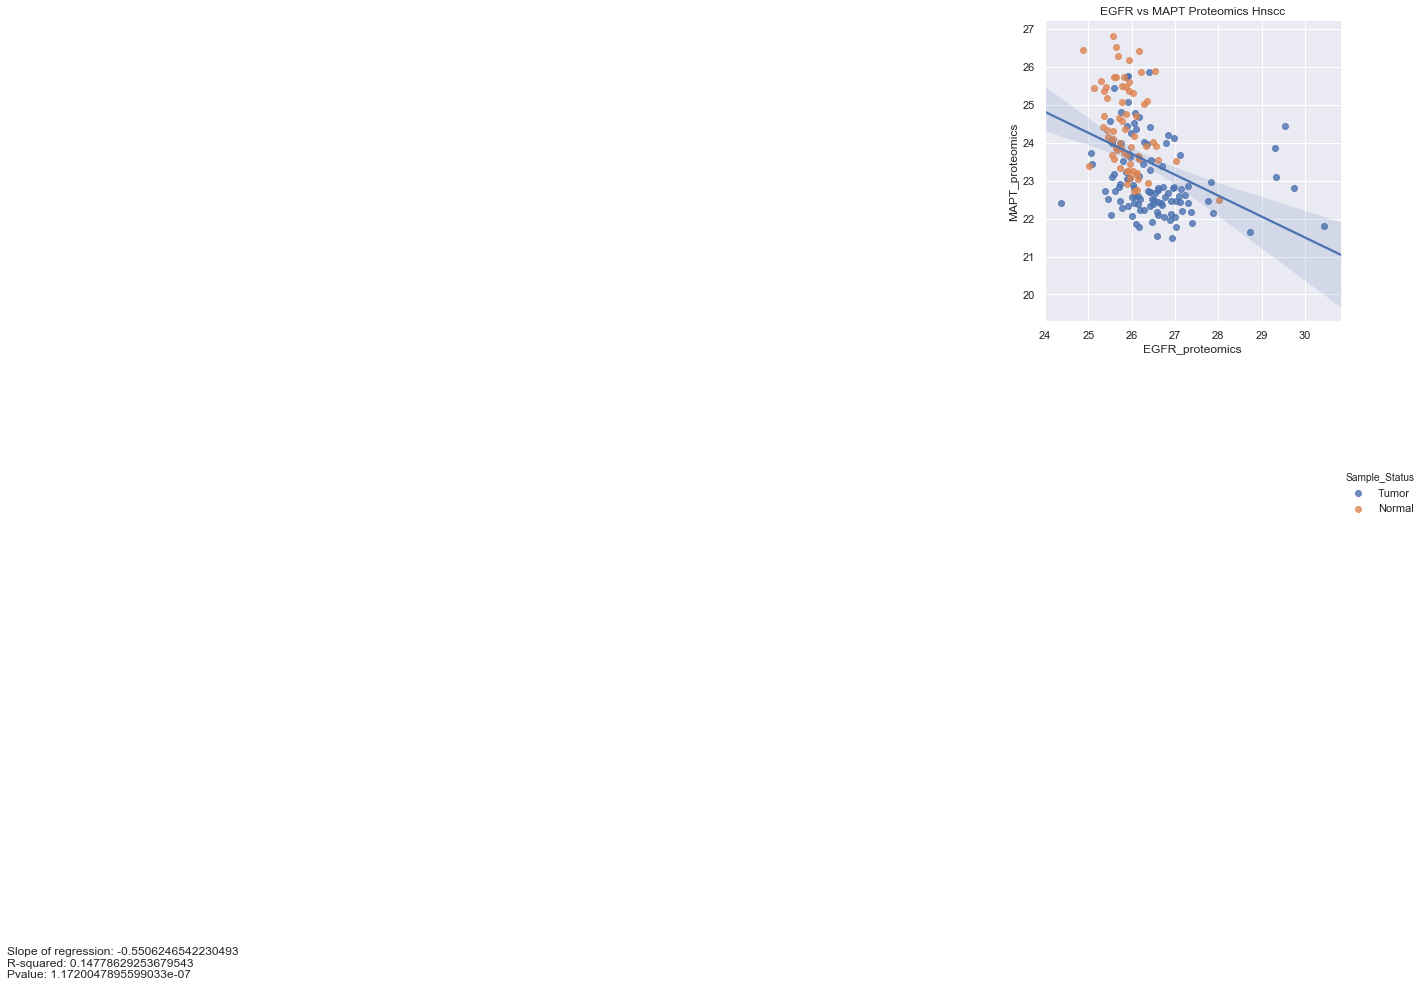

In [7]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Hnscc", ra_stats = True, show_plot = True)

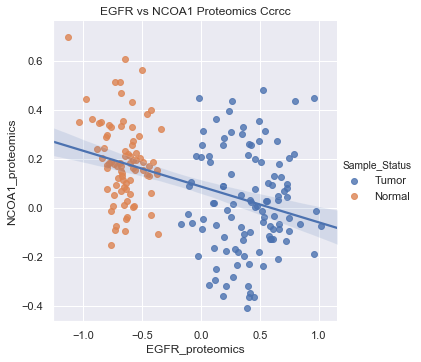

In [182]:
df1_subset = df1[["EGFR_proteomics","NCOA1_proteomics","Sample_Status"]]
df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["EGFR_proteomics"]].values
y1 = df1_subset[["NCOA1_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,8)
graph = sns.lmplot(x= "EGFR_proteomics", y="NCOA1_proteomics", data=df1_subset, hue="Sample_Status", fit_reg=False)
sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
graph.set(title = "EGFR vs NCOA1 Proteomics Ccrcc")
plt.show()
plt.clf()
plt.close()



#plot_lin_regression(EGFR_prot_mut,"EGFR_proteomics","NCOA1_proteomics","EGFR vs NCOA1 Proteomics Hnscc", ra_stats = True, show_plot = True)

In [178]:
df1_subset

Name,EGFR_proteomics,NCOA1_proteomics,Sample_Status
Patient_ID,,,
C3L-00004,0.254999,0.137199,Tumor
C3L-00004.N,-0.812454,0.287768,Normal
C3L-00010,0.526561,-0.056790,Tumor
C3L-00010.N,-0.649554,0.608486,Normal
C3L-00011,0.268540,0.016300,Tumor
...,...,...,...
C3N-01649.N,-0.592099,0.256959,Normal
C3N-01651,0.554559,0.029365,Tumor
C3N-01651.N,-0.631186,-0.037471,Normal


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


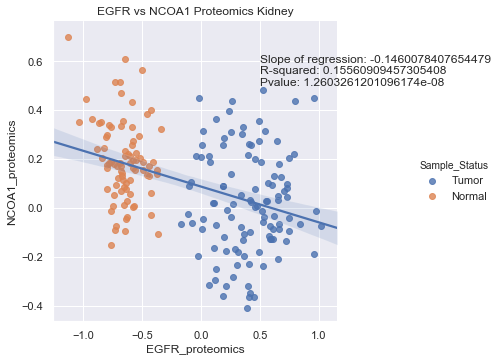

In [229]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["NCOA1","EGFR"])

df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","NCOA1_proteomics", "Sample_Status",title = "EGFR vs NCOA1 Proteomics Kidney", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


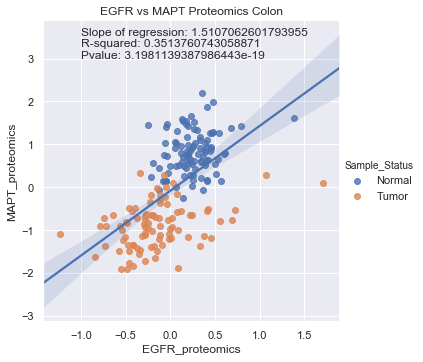

In [219]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Colon", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


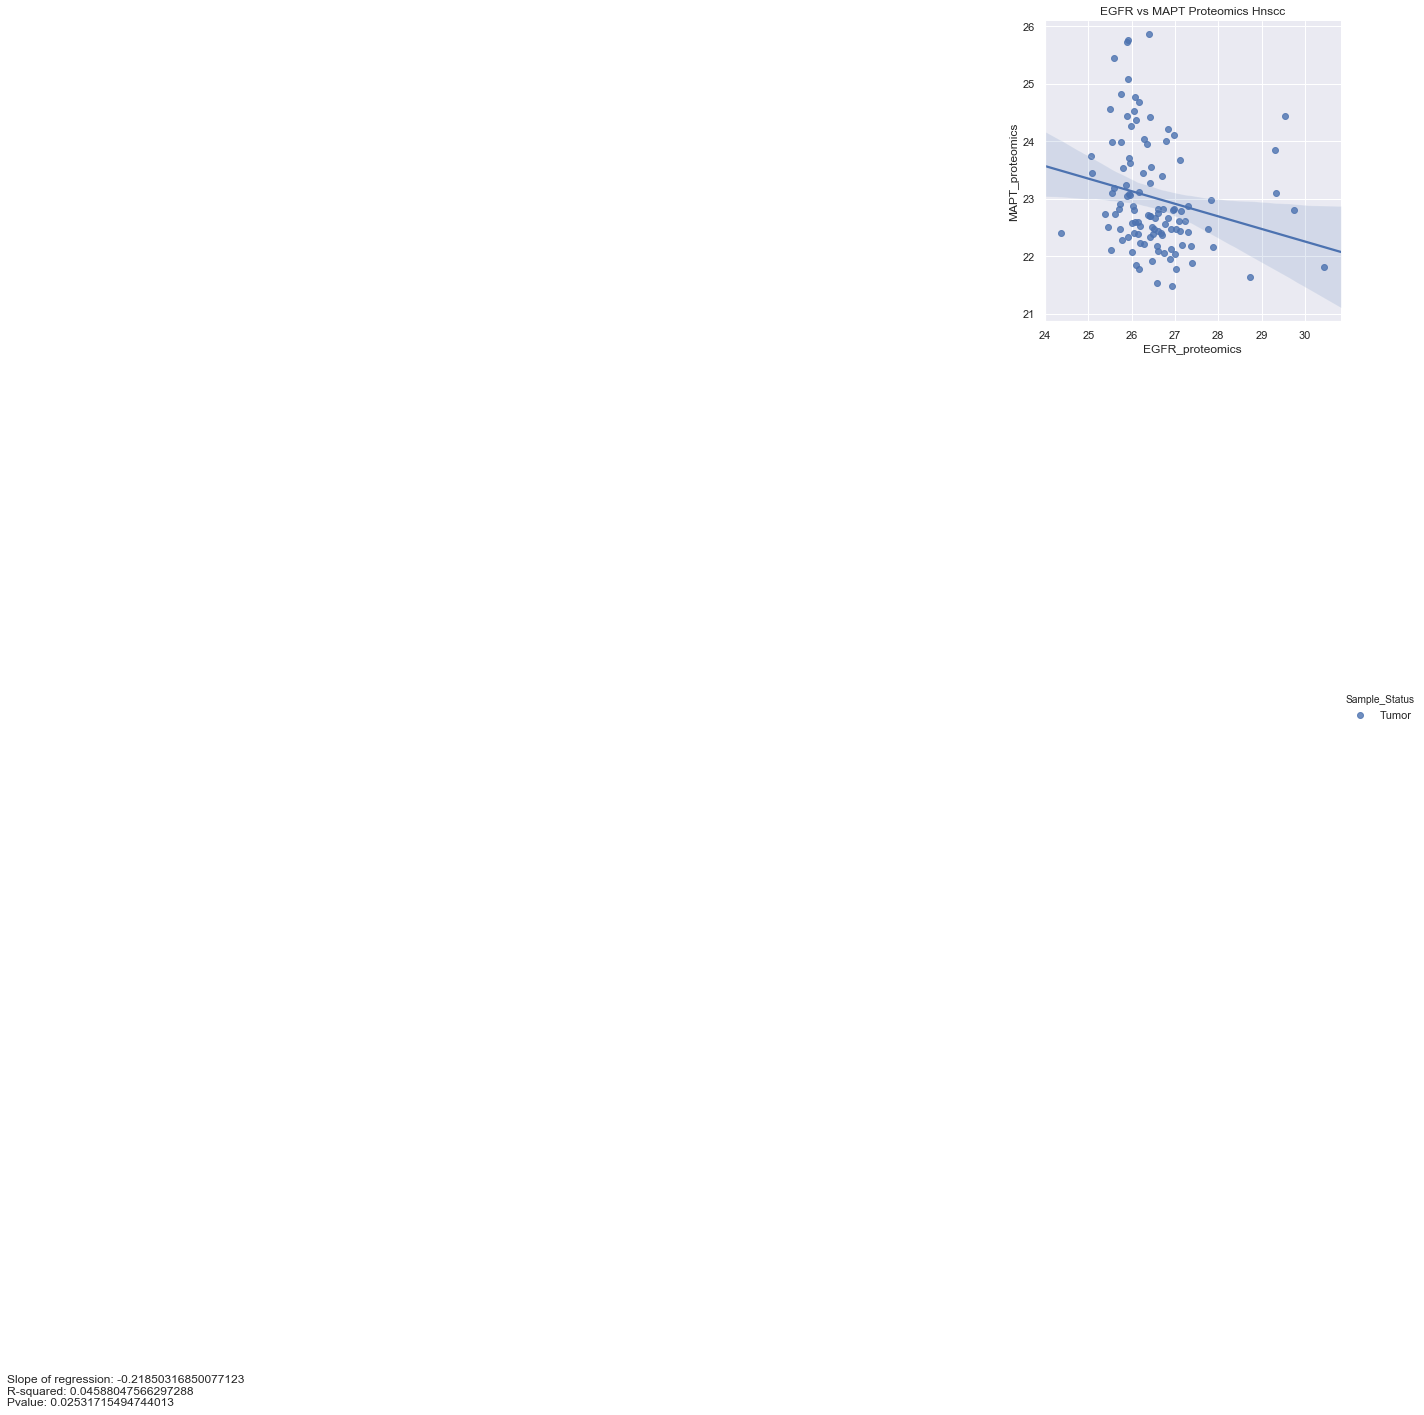

In [7]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1_tumor = df1.loc[df1['Sample_Status'] == "Tumor"]
df1_tumor
plot_lin_regression(df1_tumor,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Hnscc", ra_stats = True, show_plot = True)

In [6]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1
#plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Luad", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


Name,EGFR_proteomics,GRB2_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status
Patient_ID,,,,,,
C3L-00001,7.5892,-0.8305,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00001.N,-0.6942,0.6358,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3L-00009,-1.8777,2.1314,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00009.N,-2.1871,1.3348,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3L-00080,-1.2350,0.3255,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...
C3N-02729.N,-1.4164,-0.1625,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
X11LU013,5.1657,-0.7510,[In_Frame_Del],[p.E746_S752delinsA],Single_mutation,Tumor
X11LU016,0.6080,0.7931,"[Missense_Mutation, Missense_Mutation]","[p.G719C, p.S768I]",Multiple_mutation,Tumor


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


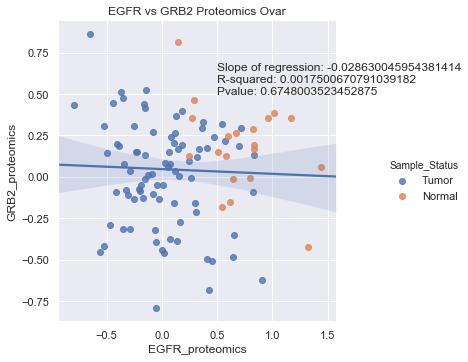

In [268]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Ovar", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


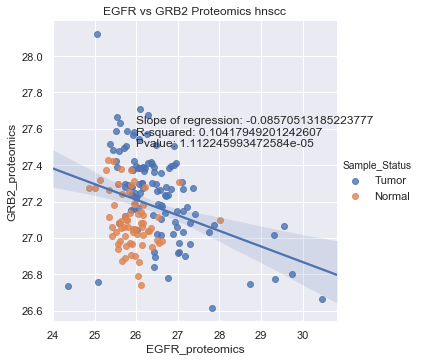

In [275]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


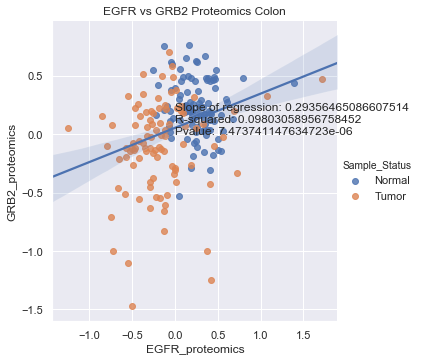

In [278]:

#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Colon", ra_stats = True, show_plot = True)

In [288]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1
#plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Ccrcc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


Name,EGFR_proteomics,MAPT_proteomics,MAPT_proteomics,MAPT_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status
Patient_ID,,,,,,,,
C3L-00004,0.254999,-0.719573,NaN,0.358904,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00004.N,-0.812454,-0.328758,NaN,-1.461912,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3L-00010,0.526561,-1.122201,NaN,-0.796236,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00010.N,-0.649554,-0.388174,NaN,-1.350821,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3L-00011,0.268540,-0.711147,NaN,-0.276017,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...,...,...
C3N-01649.N,-0.592099,-0.036555,NaN,-1.211079,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3N-01651,0.554559,-1.563996,NaN,-0.936174,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3N-01651.N,-0.631186,0.659668,NaN,-0.478122,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
